In [1]:
import matplotlib.pyplot as py
import pandas as pd
import numpy as np
import random as rd
import seaborn as sns

In [2]:
loc = input("Enter position of file in ur pc with double backslash, for default location type \"1\": ")
if (loc == "1"):
    loc = "dinos.csv"
data = pd.read_csv(loc)

Enter position of file in ur pc with double backslash, for default location type "1":  1


In [3]:
species = data.Species.unique()
speciesdict = dict(zip(species, range(len(species))))
data = data.replace(speciesdict)
data = data.replace({'M':0,'F':1})
print(data)

     Species  Weight  Length   Age  TailLength   Height   Width  Gender  \
0          0  1650.0    59.0  63.4        68.0  10.8120  7.4800       0   
1          1   145.0    22.0  24.0        25.5   6.3750  3.8250       0   
2          1   820.0    37.1  40.0        42.5  11.1350  6.6300       1   
3          2   242.0    23.2  25.4        30.0  11.5200  4.0200       1   
4          1   650.0    36.5  39.0        41.4  11.1366  6.0030       0   
..       ...     ...     ...   ...         ...      ...     ...     ...   
154        5     7.0    10.1  10.6        11.6   1.7284  1.1484       1   
155        2   850.0    32.8  36.0        41.6  16.8896  6.1984       1   
156        1   900.0    37.0  40.0        42.5  11.7300  7.2250       0   
157        6   273.0    23.0  25.0        28.0  11.0880  4.1440       1   
158        5     6.7     9.3   9.8        10.8   1.7388  1.0476       1   

     Completeness  
0           0.545  
1           0.531  
2           0.661  
3           0.793  

In [4]:
a = np.arange(data.shape[0])
np.random.shuffle(a)
Train = data.iloc[a[:int(data.shape[0]*0.7)],]
Test = data.iloc[a[int(data.shape[0]*0.7):],]
print(Train)
print(Test)

     Species  Weight  Length   Age  TailLength   Height   Width  Gender  \
155        2   850.0    32.8  36.0        41.6  16.8896  6.1984       1   
42         2   680.0    31.8  35.0        40.6  15.4686  6.1306       0   
33         3   120.0    19.4  21.0        23.7   6.1146  3.2943       0   
157        6   273.0    23.0  25.0        28.0  11.0880  4.1440       1   
114        2   500.0    29.1  31.5        36.4  13.7592  4.3680       0   
..       ...     ...     ...   ...         ...      ...     ...     ...   
90         2   975.0    37.4  41.0        45.9  18.6354  6.7473       1   
153        5    19.9    13.8  15.0        16.2   2.9322  1.8792       0   
37         3   120.0    18.6  20.0        22.2   6.2160  3.5742       1   
71         2   500.0    26.8  29.7        34.5  14.1795  5.2785       0   
118        1   135.0    20.0  22.0        23.5   5.8750  3.5250       1   

     Completeness  
155         0.849  
42          0.559  
33          0.889  
157         0.341  

In [5]:
mean = Train.mean()
max = Train.max()
min = Train.min()
weight = Train.Weight
Train = (Train - mean)/(max-min)
Train.Weight = weight
weight = Test.Weight
Test = (Test - mean)/(max-min)
Test.Weight = weight
print(Train)
print(Test)

      Species  Weight    Length       Age  TailLength    Height     Width  \
155 -0.043544   850.0  0.130549  0.140967    0.180700  0.469213  0.274637   
42  -0.043544   680.0  0.110428  0.122311    0.163217  0.385701  0.264590   
33   0.123123   120.0 -0.139069 -0.138883   -0.132237 -0.164037 -0.155721   
157  0.623123   273.0 -0.066634 -0.064256   -0.057062  0.128251 -0.029804   
114 -0.043544   500.0  0.056102  0.057012    0.089791  0.285239  0.003390   
..        ...     ...       ...       ...         ...       ...       ...   
90  -0.043544   975.0  0.223104  0.234251    0.255875  0.571814  0.355978   
153  0.456456    19.9 -0.251745 -0.250824   -0.263356 -0.351067 -0.365425   
37   0.123123   120.0 -0.155165 -0.157540   -0.158461 -0.158077 -0.114243   
71  -0.043544   500.0  0.009825  0.023430    0.056574  0.309940  0.138317   
118 -0.210210   135.0 -0.126996 -0.120227   -0.135734 -0.178118 -0.121534   

       Gender  Completeness  
155  0.585586      0.293199  
42  -0.414414  

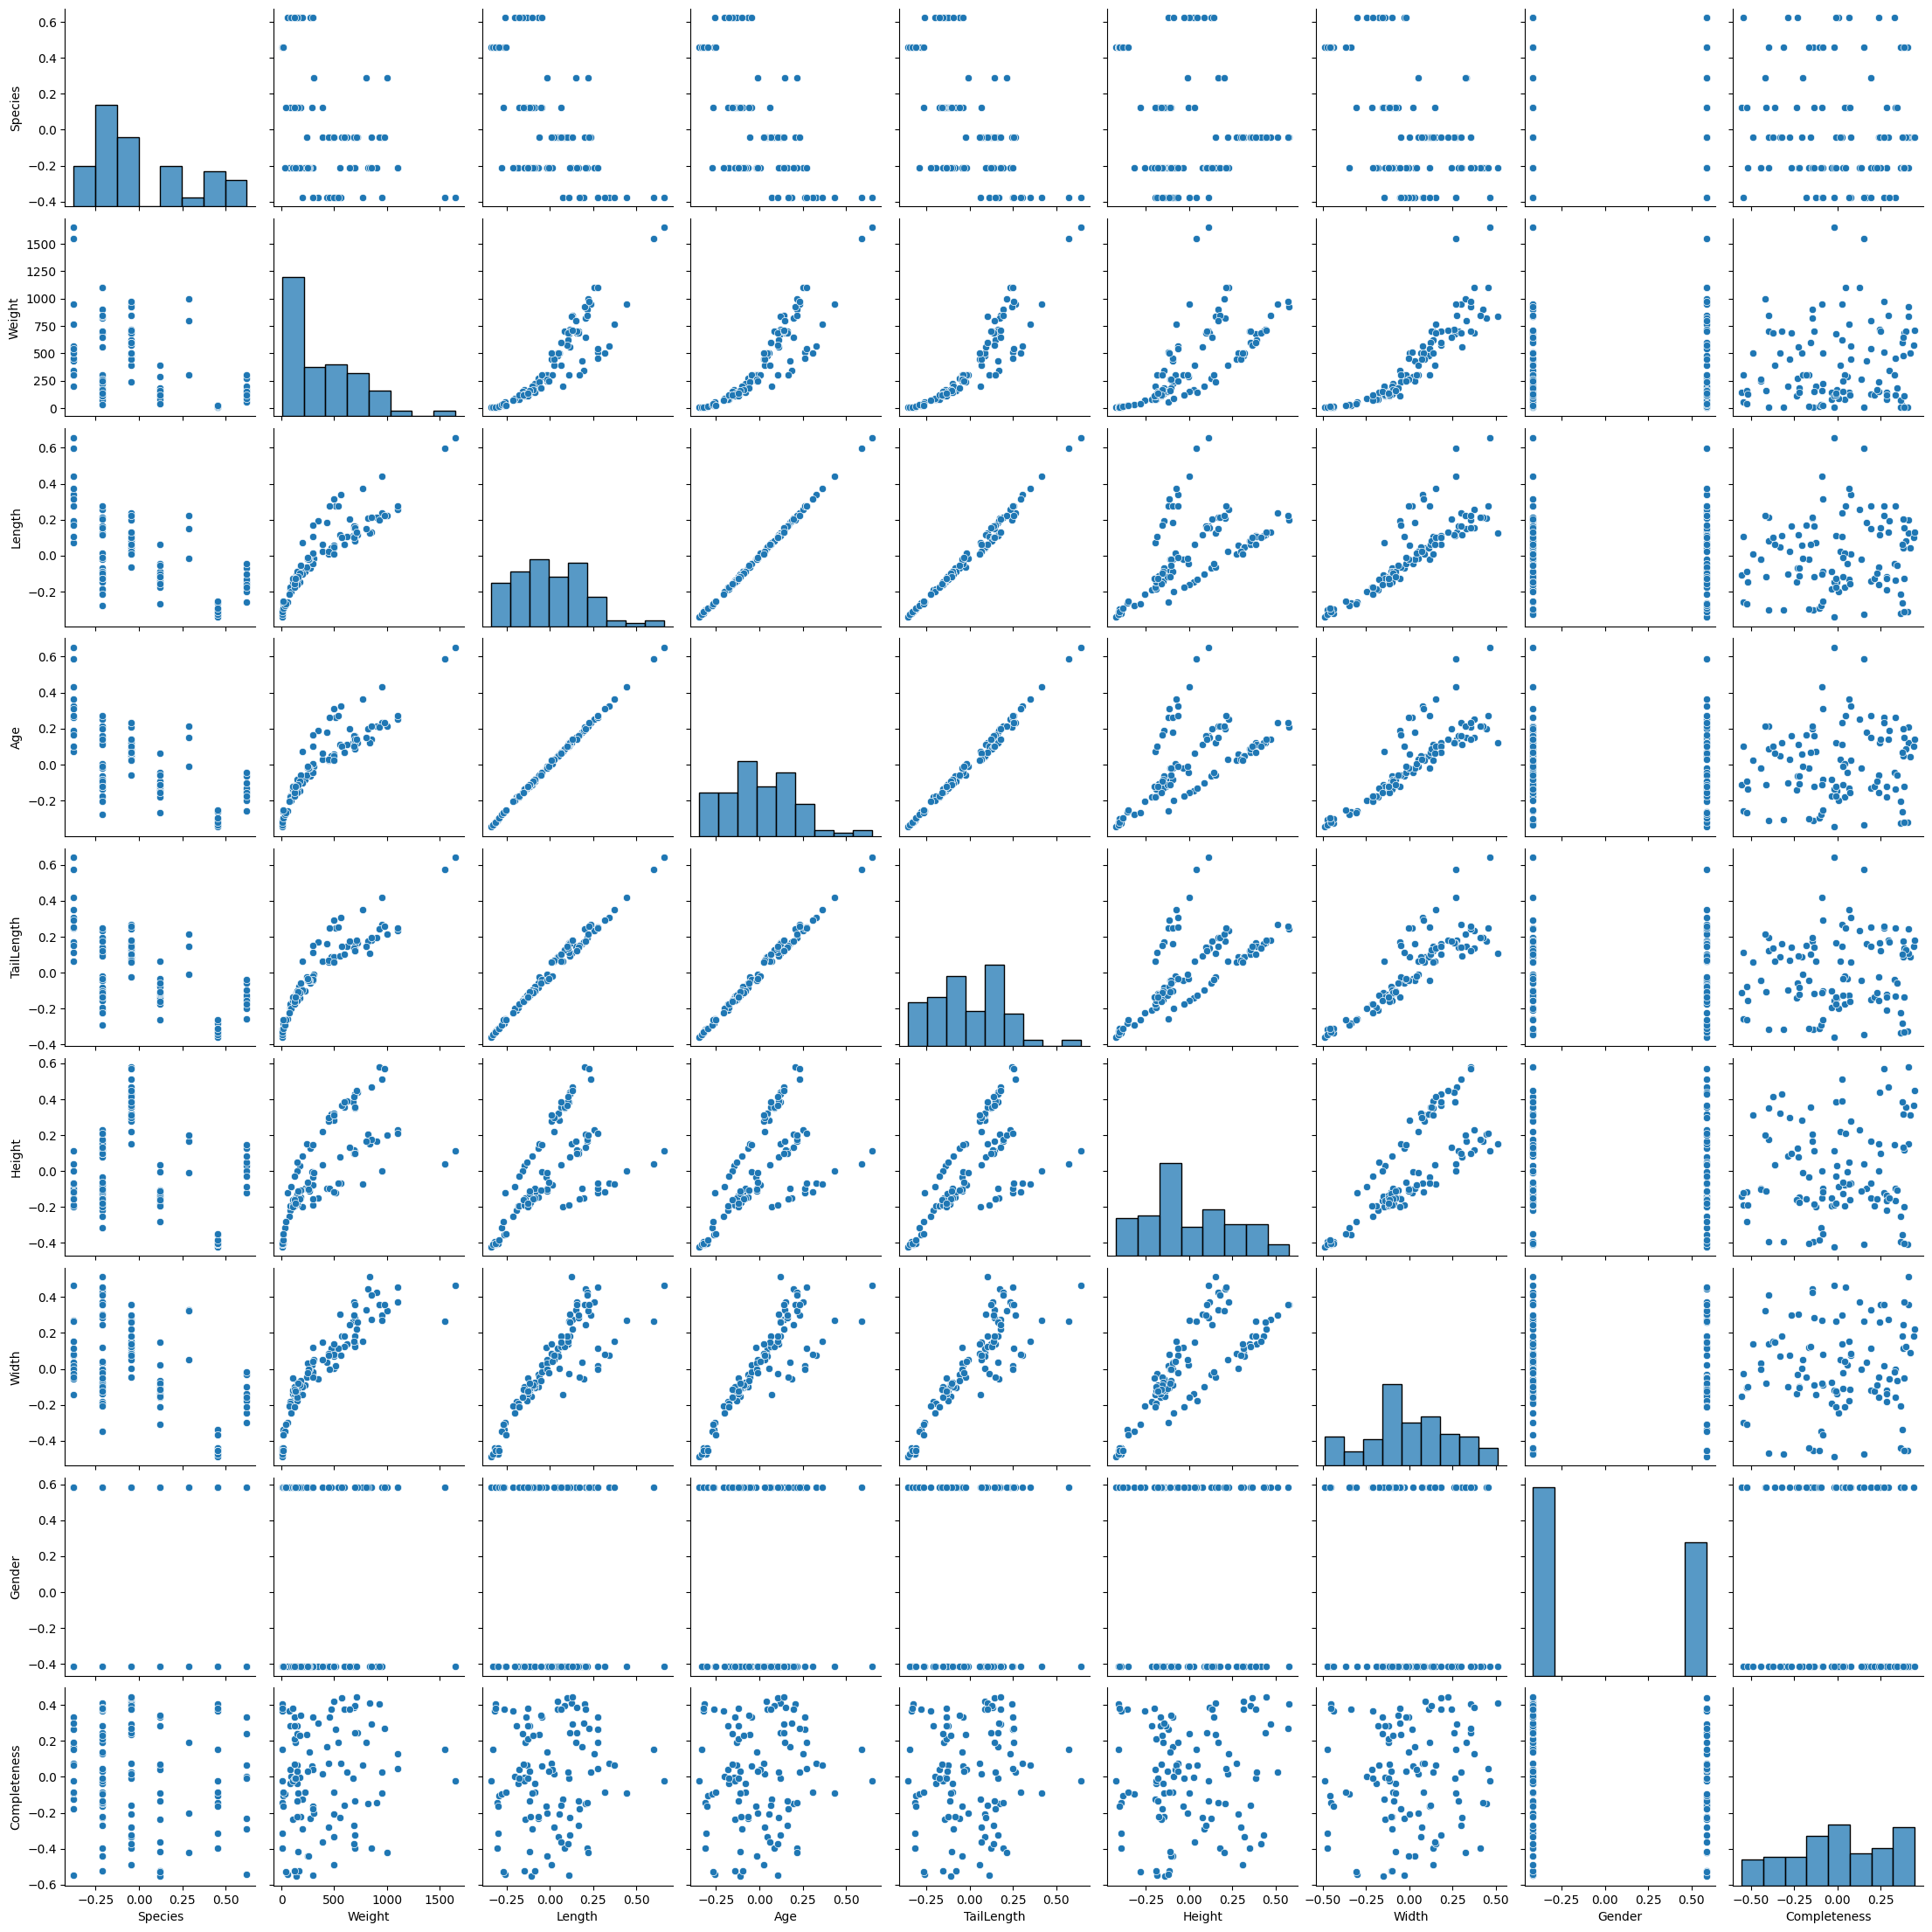

In [6]:
sns.pairplot(Train)

### From the  graph we can clearly see that weight is not linear with all other features, hence the power of the features should be greater than 1 and the categorical features (gender, species) should also be degree 2  by the looks of it although for species 4 or 6 would be better but we got less data so we dont want to overfit. completness looks completely random, so degree 2 would be good enough as it doesnt look like weight depends too much on it.

In [7]:
features = Train.loc[:,Train.columns!="Weight"].values
target = Train.Weight.values
print(features,target)

[[-0.04354354  0.13054906  0.14096746  0.18069993  0.46921321  0.27463707
   0.58558559  0.2931989 ]
 [-0.04354354  0.11042834  0.12231074  0.16321741  0.38570063  0.26458979
  -0.41441441 -0.00731924]
 [ 0.12312312 -0.13906865 -0.13888329 -0.13223713 -0.16403667 -0.15572111
  -0.41441441  0.33464968]
 [ 0.62312312 -0.06663404 -0.06425642 -0.05706231  0.12825149 -0.02980419
   0.58558559 -0.23322597]
 [-0.04354354  0.05610238  0.05701224  0.08979084  0.28523869  0.00339034
  -0.41441441 -0.2052467 ]
 [-0.37687688  0.18487502  0.17828089  0.16146916 -0.09495807  0.03428793
  -0.41441441  0.16677403]
 [-0.21021021 -0.02236844 -0.02134597 -0.04482454 -0.03424836  0.1173928
   0.58558559 -0.16483219]
 [ 0.12312312 -0.04651331 -0.0455997  -0.03608329 -0.00170137  0.0224772
   0.58558559  0.05796574]
 [ 0.45645646 -0.30204651 -0.31052508 -0.31755182 -0.39328194 -0.47112841
  -0.41441441 -0.39902908]
 [ 0.62312312 -0.14711694 -0.1444803  -0.14097839  0.02881216 -0.13851627
  -0.41441441 -0.00

In [8]:
features2 = Test.loc[:,Train.columns!="Weight"].values
target2 = Test.Weight.values

In [9]:
w= np.zeros(len(features[0])*2)
b=0

In [10]:
epochs = 20000
Learnrate = 0.001
costlist = np.zeros(epochs)
cost2list = np.zeros(epochs)
accuracylist = np.zeros(epochs)
epochlist = np.arange(epochs)

In [11]:
i=0
featuresedit = np.hstack((features,features**2))
features2edit = np.hstack((features2,features2**2))
while (i<epochs):
    prediction = np.dot(featuresedit,w)+b
    dw = (np.dot(featuresedit.T,prediction-target))/len(target)
    db = (np.sum(prediction-target))/len(target)
    w = w-Learnrate*dw
    b = b - Learnrate*db
    prediction2 = np.dot(features2edit,w)+b
    cost = np.sum((prediction-target)**2)/(2*len(target))
    costlist[i] = cost
    cost2 = np.sum((prediction2-target2)**2)/(2*len(target))
    cost2list[i] = cost2
    accuracy = 100-(np.sum(((prediction2-target2)**2))/np.sum(((np.mean(target2)-target2)**2)))*100
    accuracylist[i] = accuracy
    i=i+1

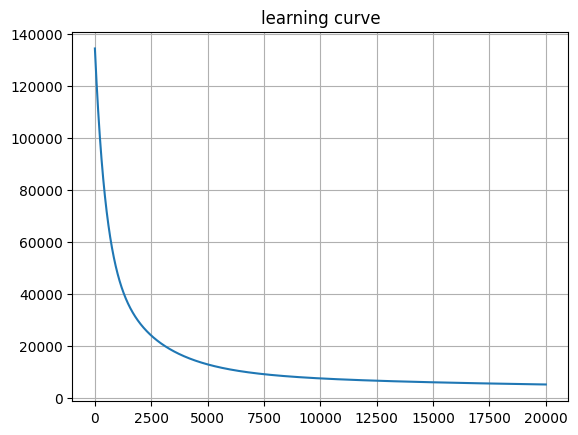

In [12]:
py.plot(epochlist,costlist)
py.title("learning curve")
py.grid()
py.show()

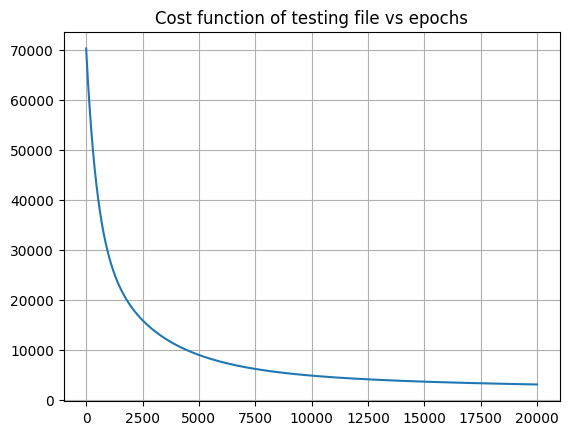

In [13]:
py.plot(epochlist,cost2list)
py.title("Cost function of testing file vs epochs")
py.grid()
py.show()

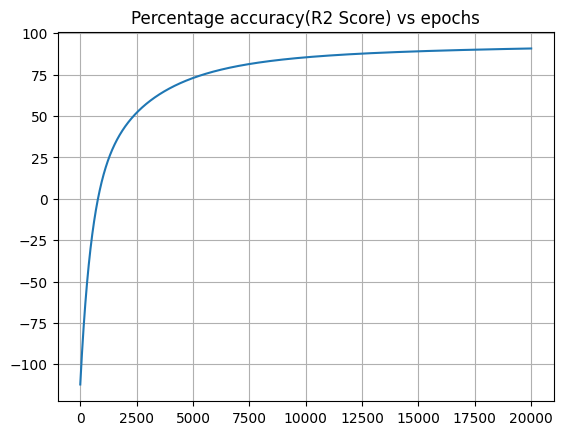

In [14]:
py.plot(epochlist,accuracylist)
py.title("Percentage accuracy(R2 Score) vs epochs")
py.grid()
py.show()

In [15]:
print("Final percentage Accuracy or R2Score: ", accuracy)

Final percentage Accuracy or R2Score:  90.79262794863324


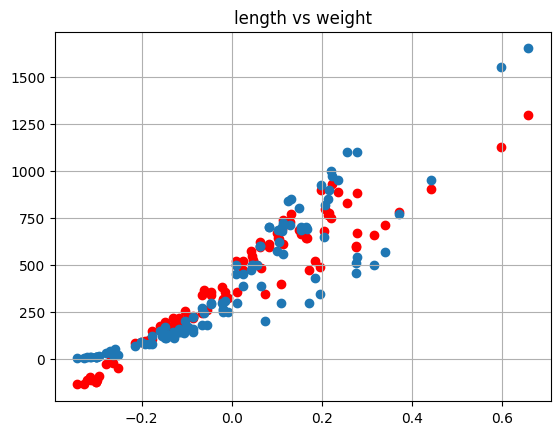

In [16]:
py.scatter(Train.Length.values,np.dot(featuresedit,w)+b, color='red')
py.scatter(Train.Length.values, Train.Weight.values)
py.title('length vs weight')
py.grid()
py.show()